<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [10]:
boston_df = boston_df.drop(boston_df.columns[0], axis=1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# For the "Median value of owner-occupied homes" provide a boxplot

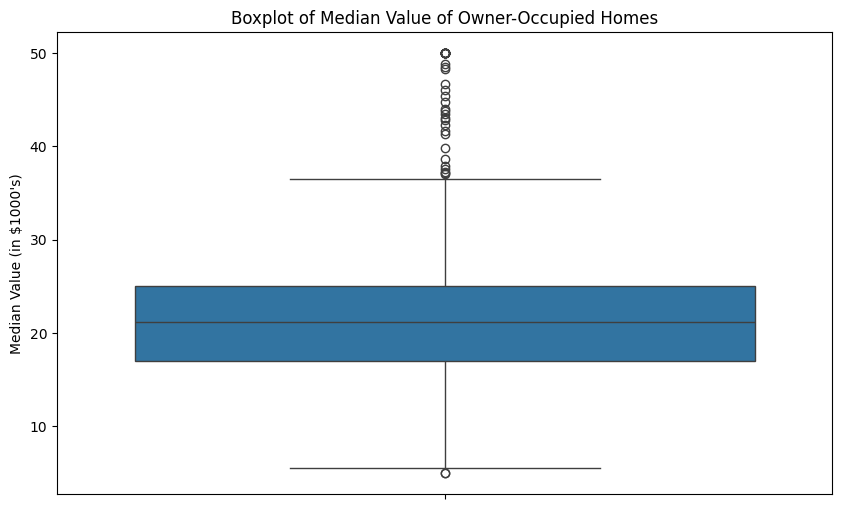

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000\'s)')
plt.show()

# Provide a  bar plot for the Charles river variable

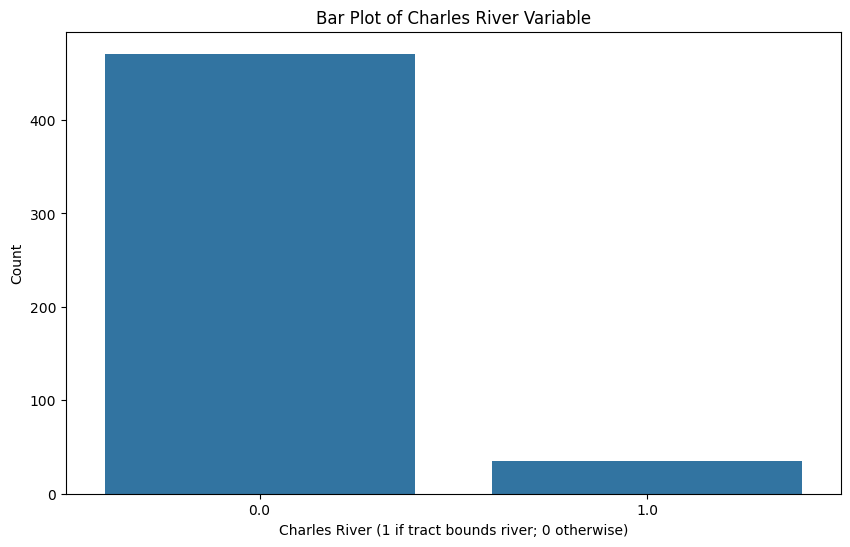

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

# Provide a boxplot for the MEDV variable vs the AGE variable

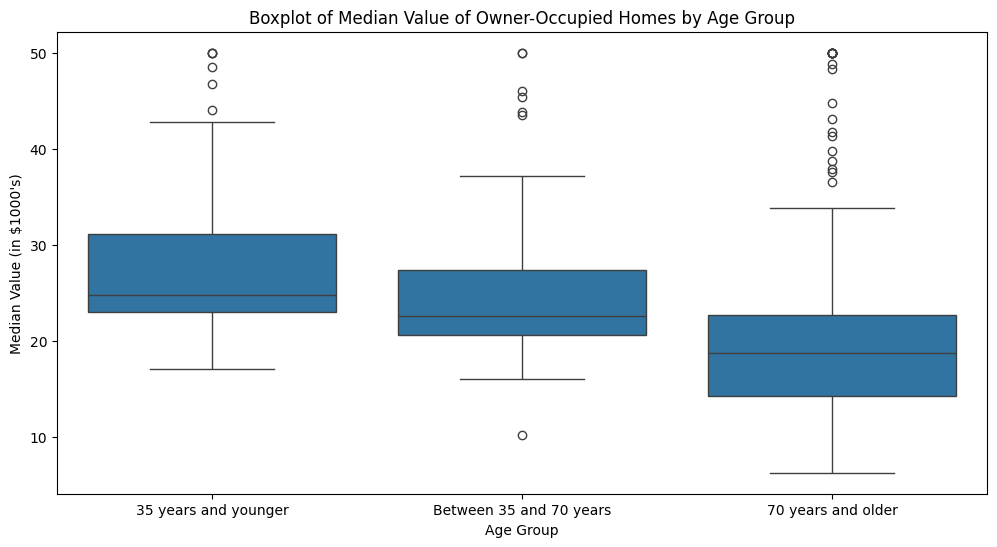

In [16]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000\'s)')
plt.show()

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

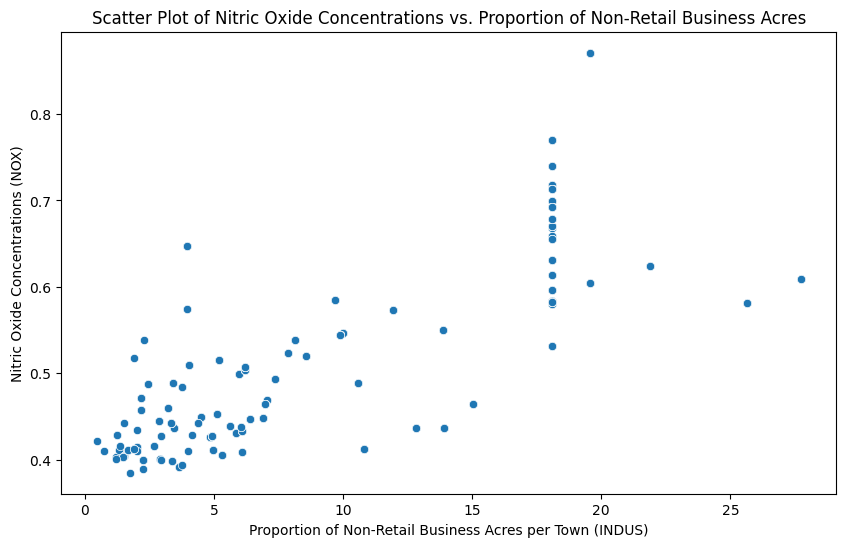

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

from above vizualisation there is an evident positive correlation between mentioned 2 variables

# Create a histogram for the pupil to teacher ratio variable

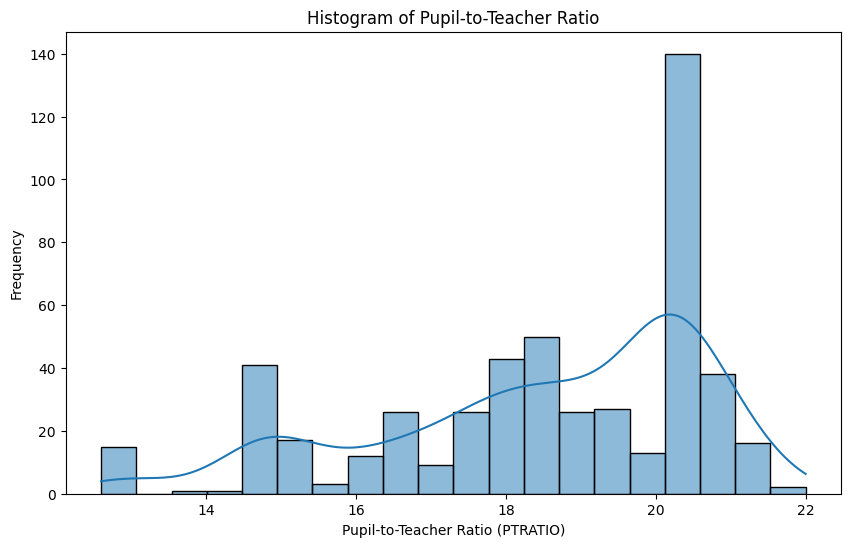

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [26]:
# Separate the data into two groups based on the CHAS variable
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform Levene's test
levene_statistic, levene_p_value = stats.levene(chas_1, chas_0)

print(f"Levene's test statistic: {levene_statistic}")
print(f"Levene's test p-value: {levene_p_value}")

Levene's test statistic: 4.590342218715871
Levene's test p-value: 0.03263097600633006


p-value is less than 0.05 then reject H0 of equal variances

In [27]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(chas_1, chas_0, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


p_value is less than 0.05 that means that there is a significant difference in median value of houses bounded by the Charles river or not

In [30]:
print(chas_0.mean())
print(chas_1.mean())

22.093842887473464
28.439999999999998


# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [31]:
groups = [boston_df[boston_df['AGE_group'] == label]['MEDV'] for label in labels]
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 30.566839914861454
P-value: 3.435569235360708e-13


p_value is less than 0.05 that means that there is a significant difference in median value of houses between at least 2 above age groups

In [35]:
print("35 years and younger:", groups[0].mean())
print("Between 35 and 70 years:", groups[1].mean())
print("70 years and older:", groups[2].mean())

35 years and younger: 27.77582417582417
Between 35 and 70 years: 24.94765625
70 years and older: 20.29959016393443


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [36]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


p_value is less than 0.05 and corr coef is tending to 1 that confirm previous vizualisation about existing positive relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [37]:
# Define the independent variable (DIS) and the dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        17:14:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The coefficient for DIS is 1.0916, which means that for each additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes increases by approximately $1.0916 (in thousands of dollars). This relationship is statistically significant, as indicated by the p-value of 0.000, which is less than 0.05.

Therefore, an additional weighted distance to the five Boston employment centers has a positive impact on the median value of owner-occupied homes, increasing it by approximately $1.0916.